In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Iris.csv').iloc[:,1:-1]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df = PCA(n_components = 2).fit_transform(df.values)

In [4]:
def euclidean_distance(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

In [5]:
def random_centroids(k, X):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroid = X[np.random.choice(range(X.shape[0]))]
        centroids[i] = centroid
    return centroids

In [6]:
r_centroids = random_centroids(5, df)

In [7]:
r_centroids

array([[-2.67384469, -0.1066917 ],
       [ 1.28479459,  0.68543919],
       [ 3.07652162,  0.68576444],
       [ 2.56332271,  0.2759745 ],
       [ 1.37873698, -0.42120514]])

In [8]:
results = []
for i in range(df.shape[0]):
    results.append(np.argmin([euclidean_distance(df[i,:], r_centroids[x, :]) for x in range(5)]))
Y = np.array(results)

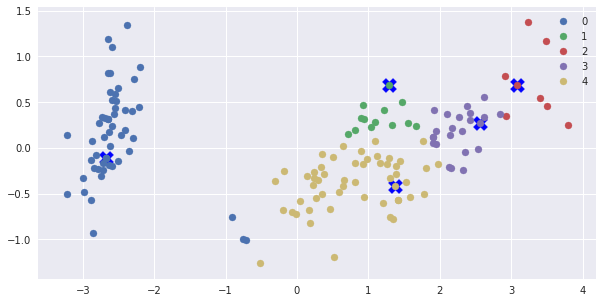

In [9]:
fig = plt.figure(figsize=(10,5))
colors = sns.color_palette()
plt.scatter(r_centroids[:,0], r_centroids[:,1], color='b',marker='X', s=200)
for no, i in enumerate(np.unique(Y)):
    plt.scatter(df[Y==i,0], df[Y==i,1], color=colors[no],label = no)
plt.legend()
plt.show()